# Predicting Credit Card Approval

Vivien C.

### Statement

- The promotion of credit card sign-up rewards have spurred an influx of credit card applications. In order to determine if an applicant would be a good customer for a bank, banks will look at a variety of information about an applicant, such as credit scores, number of hard/soft credit inquiries, income levels, prior defaults, etc. As there are many variables to take into account, manually investigating all these variables can be time-consuming and can result in data errors. As such, this notebook aims to figure out: 
a) what are the main data factors that impact a customer getting approval, and 
b) use machine learning to build a credit card approval predictor (with as high an accuracy as possible) to predict if a future customer will be approved based on their information provided.

- The data that will be used is from Kaggle: Credit Card Approvals https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?resource=download&select=clean_dataset.csv
- There is no information about which country or bank this data is from, and the data has been anonymized for privacy reasons

In [1]:
# Starting code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))



## Importing Libraries

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
import warnings
warnings.filterwarnings("ignore")

# For other styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight') 
# plt.style.use('dark_background')

# Import seaborn
import seaborn as sns # For Plotting

# Import sklearn models
from sklearn.model_selection import train_test_split # Split dataset for modelling
from sklearn.preprocessing import StandardScaler #can_delete
from sklearn.ensemble import RandomForestClassifier #can_delete
from sklearn.linear_model import LogisticRegression # For modelling
from sklearn import svm #can_delete
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #can_delete

## Importing Dataset as a Dataframe

In [3]:
df_cc_apps = pd.read_csv('clean_dataset.csv')

# run dataframe to see what data we are dealing with. this will essentially give us df.head() and df.tail()
df_cc_apps

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


As referenced from the Kaggle Dataset legend:

- Gender: 0 = Female, 1 = Male
- Age: in years
- Debt: outstanding debt
- Married: 0 = Single/Divorced etc, 1 = Married
- BankCustomer: 0 = No Bank Account, 1 = Has Bank Account
- Industry: As shown
- Ethnicity: White/Black/Others(Asians, Latinos, etc)
- YearsEmployed: As Shown
- PriorDefault: 0 = No prior defaults, 1 = Yes
- Employed: 0 = Not Employed, 1 = Yes
- CreditScore: This has been scaled
- Income: This has been scaled
- Approved: 0 = Not Approved, 1 = Approved

#### Investigating the Dataset - Primary impressions
- The dataset is not very big. At first glance, it looks like not much pre-processing will be required, but we will investigate further with an EDA

## Exploratory Data Analysis (EDA)

In [4]:
# Summary of statistics 

df_cc_apps_description = df_cc_apps.describe()
df_cc_apps_description

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [5]:
# Dataframe information

df_cc_apps_info = df_cc_apps.info()
df_cc_apps_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [6]:
# Checking for duplicate values
df_cc_apps.duplicated().value_counts()

False    690
dtype: int64

In [7]:
# Checking to see if unique values are accurate (e.g approval, married, bankcustomer should be binary)
df_cc_apps.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [8]:
df_cc_apps.tail(17)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,1,29.50,2.000,0,0,Education,Black,2.000,0,0,0,0,ByBirth,256,17,0
674,0,37.33,2.500,1,1,ConsumerDiscretionary,Black,0.210,0,0,0,0,ByBirth,260,246,0
675,0,41.58,1.040,1,1,ConsumerStaples,White,0.665,0,0,0,0,ByBirth,240,237,0
676,0,30.58,10.665,1,1,Materials,Black,0.085,0,1,12,1,ByBirth,129,3,0
677,1,19.42,7.250,1,1,CommunicationServices,White,0.040,0,1,1,0,ByBirth,100,1,0
678,0,17.92,10.210,1,1,Healthcare,Latino,0.000,0,0,0,0,ByBirth,0,50,0
679,0,20.08,1.250,1,1,Energy,White,0.000,0,0,0,0,ByBirth,0,0,0
680,1,19.50,0.290,1,1,Financials,White,0.290,0,0,0,0,ByBirth,280,364,0
681,1,27.83,1.000,0,0,Real Estate,Black,3.000,0,0,0,0,ByBirth,176,537,0
682,1,17.08,3.290,1,1,ConsumerDiscretionary,White,0.335,0,0,0,1,ByBirth,140,2,0


#### We can see from the above that the data has no special characters, no null values, no duplicate values
- If there were non-numeric data (e.g Yes/No) then we would convert it to numeric values because many machine learning models require the data to be numeric. Numeric data will also help with classification and regression models later on. This can be done using sklearn's LabelEncoder, for example.

### Preparing Data Further
The model should not be biased on the basis of gender, ethinicity, citizenship, or location, hence these columns will be eliminated from the data moving forward and will not be part of the machine learning model.

In [9]:
# removing Gender, Ethnicity, Location from columns
removed_cols = [x for x in df_cc_apps.columns if x not in ["Gender","Ethnicity", "Citizen", "ZipCode"]]
removed_cols

['Age',
 'Debt',
 'Married',
 'BankCustomer',
 'Industry',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Income',
 'Approved']

In [10]:
# renaming the updated table with removed columns to df from df_cc_apps
df = df_cc_apps[removed_cols]
df

,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,30.83,0.000,1,1,Industrials,1.25,1,1,1,0,0,1
1,58.67,4.460,1,1,Materials,3.04,1,1,6,0,560,1
2,24.50,0.500,1,1,Materials,1.50,1,0,0,0,824,1
3,27.83,1.540,1,1,Industrials,3.75,1,1,5,1,3,1
4,20.17,5.625,1,1,Industrials,1.71,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,0,0,Education,1.25,0,0,0,0,0,0
686,22.67,0.750,1,1,Energy,2.00,0,1,2,1,394,0
687,25.25,13.500,0,0,Healthcare,2.00,0,1,1,1,1,0
688,17.92,0.205,1,1,ConsumerStaples,0.04,0,0,0,0,750,0


### Visualizing correlations

Through the following, we hope to discover data distribution patterns, and plot heatmap to inspect correlations as part of the EDA

In [11]:
# Table correlation between variables

df.corr()

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
Age,1.000000,0.202177,0.106929,0.099477,0.391464,0.204434,0.086037,0.187327,0.053599,0.018719,0.164086
Debt,0.202177,1.000000,0.074649,0.083781,0.298902,0.244317,0.174846,0.271207,-0.013023,0.123121,0.206294
Married,0.106929,0.074649,1.000000,0.992033,0.069945,0.145073,0.175428,0.113968,-0.009784,-0.006899,0.180583
BankCustomer,0.099477,0.083781,0.992033,1.000000,0.075905,0.138535,0.170268,0.111077,-0.002402,0.057273,0.188964
YearsEmployed,0.391464,0.298902,0.069945,0.075905,1.000000,0.345689,0.222982,0.322330,0.138139,0.051345,0.322475
PriorDefault,0.204434,0.244317,0.145073,0.138535,0.345689,1.000000,0.432032,0.379532,0.091276,0.090012,0.720407
Employed,0.086037,0.174846,0.175428,0.170268,0.222982,0.432032,1.000000,0.571498,0.017043,0.077652,0.458301
CreditScore,0.187327,0.271207,0.113968,0.111077,0.322330,0.379532,0.571498,1.000000,0.006944,0.063692,0.406410
DriversLicense,0.053599,-0.013023,-0.009784,-0.002402,0.138139,0.091276,0.017043,0.006944,1.000000,0.019201,0.031625
Income,0.018719,0.123121,-0.006899,0.057273,0.051345,0.090012,0.077652,0.063692,0.019201,1.000000,0.175657


<Figure size 1152x864 with 0 Axes>

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Debt'),
 Text(2.5, 0, 'Married'),
 Text(3.5, 0, 'BankCustomer'),
 Text(4.5, 0, 'YearsEmployed'),
 Text(5.5, 0, 'PriorDefault'),
 Text(6.5, 0, 'Employed'),
 Text(7.5, 0, 'CreditScore'),
 Text(8.5, 0, 'DriversLicense'),
 Text(9.5, 0, 'Income'),
 Text(10.5, 0, 'Approved')]

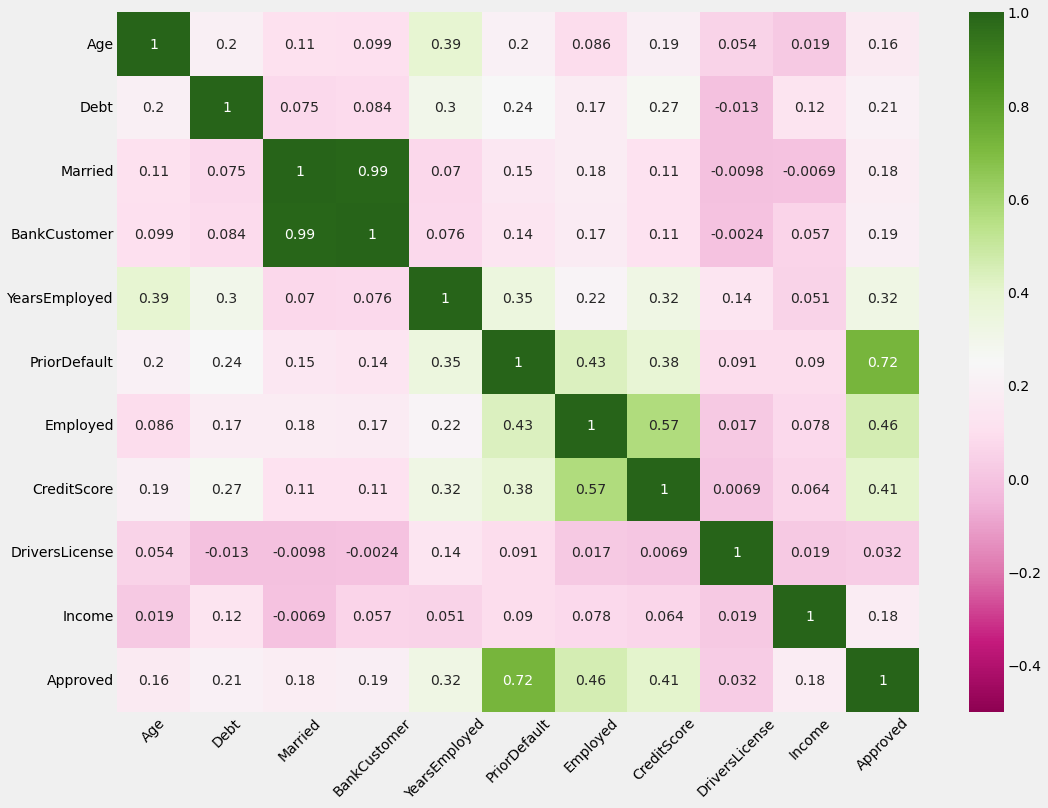

In [12]:
# Heatmap visualization of correlation between variables

plt.figure(figsize=(16,12))
df_heatmap = sns.heatmap(df.corr(),annot=True,cmap="PiYG", vmin=-0.5, vmax=1) 
# setting the vmin and vmax to a point that gives me the greatest visual rep of divergence to show strongest correlation

# showing and rotating labels on heatmap
df_heatmap.set_xticklabels(df_heatmap.get_xticklabels(), rotation=45)


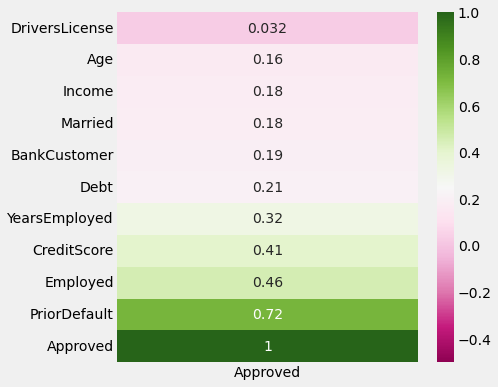

In [13]:
# Let's rank all the variables in order of high to low correlation with another heatmap
# This will give a better idea of the variables to focus on
corrdf = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrdf[['Approved']].sort_values(by=["Approved"]),
            vmin=-0.5,
            cmap='PiYG',
            annot=True);

- The green boxes indicate higher relative levels of correlation between the 2 variables: the ones that stand out in particular are YearsEmployed, PriorDefault, Employed, and CreditScore with regards to "Approved" status

0    383
1    307
Name: Approved, dtype: int64


<AxesSubplot:ylabel='Approved'>

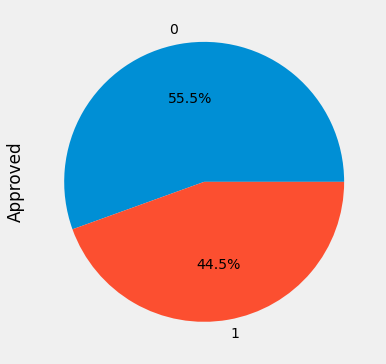

In [14]:
# checking overall number of approvals vs denials
print(df['Approved'].value_counts())
df['Approved'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(6,6))
plt.show()

### Investigating strongest correlations

Based on the above analysis, we will explore the following correlation with "Approved" status further.
- YearsEmployed
- Employed
- PriorDefault
- CreditScore 

In [15]:
# Create a copy for study
df_pp = df.copy()
# Renaming study components 0 and 1 to No and Yes
df_pp['Approved'] = df_pp['Approved'].map({1: 'yes', 0: 'no'})
# Print renamed dataframe
df_pp

,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,30.83,0.000,1,1,Industrials,1.25,1,1,1,0,0,yes
1,58.67,4.460,1,1,Materials,3.04,1,1,6,0,560,yes
2,24.50,0.500,1,1,Materials,1.50,1,0,0,0,824,yes
3,27.83,1.540,1,1,Industrials,3.75,1,1,5,1,3,yes
4,20.17,5.625,1,1,Industrials,1.71,1,0,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,0,0,Education,1.25,0,0,0,0,0,no
686,22.67,0.750,1,1,Energy,2.00,0,1,2,1,394,no
687,25.25,13.500,0,0,Healthcare,2.00,0,1,1,1,1,no
688,17.92,0.205,1,1,ConsumerStaples,0.04,0,0,0,0,750,no


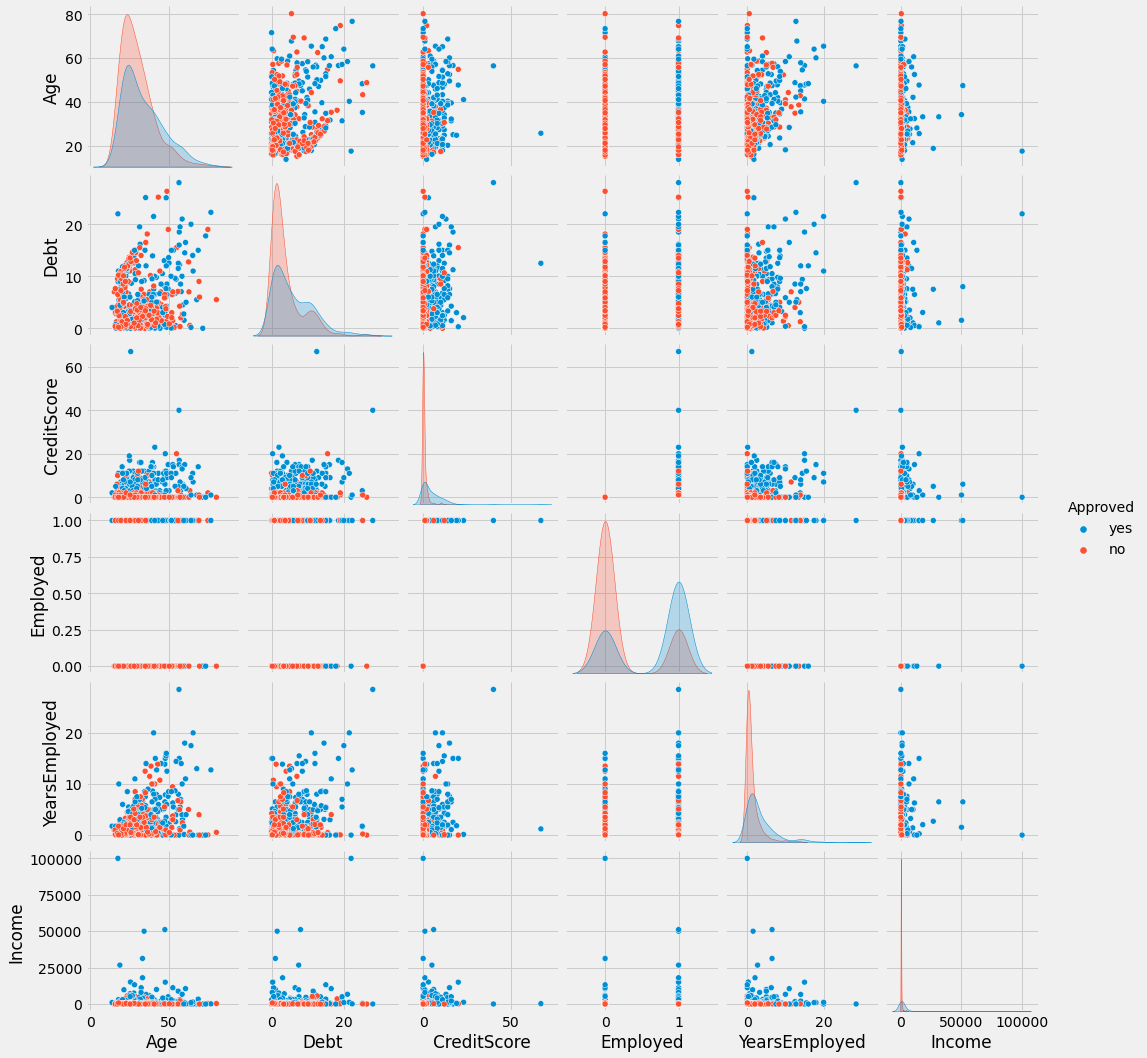

In [16]:
# plotting the various variables against approval using pairplot for quick overall view
sns.pairplot(df_pp[['Age', 'Debt', 'CreditScore', 'Employed', 'YearsEmployed', 'Income', 'Approved']], hue="Approved")

- Through the pairplot, we can see overall trends and relationships between two variables for follow-up analysis to further our EDA - the relationships of 3 pairs will be explored below

### Case Study A: Employment (YearsEmployed and Employed) against Approved

In [17]:
# Create a copy for study
df_employ = df.copy()
# Renaming study components 0 and 1 to No and Yes
df_employ['Approved'] = df_employ['Approved'].map({1: 'yes', 0: 'no'})
df_employ['Employed'] = df_employ['Employed'].map({1: 'yes', 0: 'no'})
# Print renamed dataframe
df_employ

,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,30.83,0.000,1,1,Industrials,1.25,1,yes,1,0,0,yes
1,58.67,4.460,1,1,Materials,3.04,1,yes,6,0,560,yes
2,24.50,0.500,1,1,Materials,1.50,1,no,0,0,824,yes
3,27.83,1.540,1,1,Industrials,3.75,1,yes,5,1,3,yes
4,20.17,5.625,1,1,Industrials,1.71,1,no,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,0,0,Education,1.25,0,no,0,0,0,no
686,22.67,0.750,1,1,Energy,2.00,0,yes,2,1,394,no
687,25.25,13.500,0,0,Healthcare,2.00,0,yes,1,1,1,no
688,17.92,0.205,1,1,ConsumerStaples,0.04,0,no,0,0,750,no


In [18]:
# checking binary correlation between Employed and Approval
pd.crosstab(df_employ.Approved, df_employ.Employed)

Employed,no,yes
Approved,,
no,297,86
yes,98,209


<AxesSubplot:xlabel='Income', ylabel='YearsEmployed'>

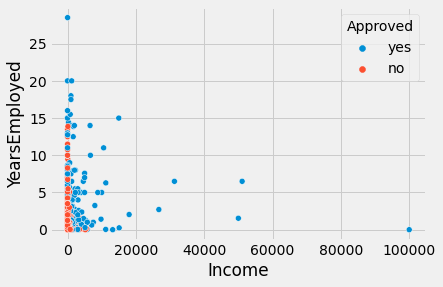

In [19]:
sns.scatterplot(data=df_employ, x="Income", y="YearsEmployed", hue="Approved")

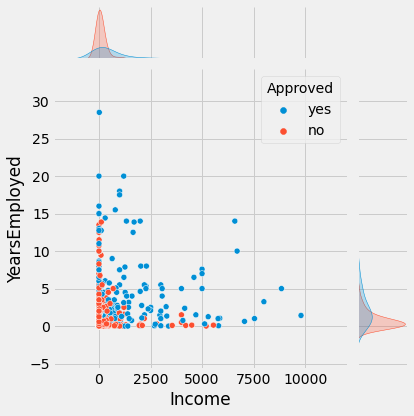

In [20]:
# Investigating the cluster of data between 0 to 10000 more closely
sns.jointplot(data=df_employ[df_employ.Income < 10000], x="Income", y="YearsEmployed", hue="Approved")

**Findings**
- Employment (Yes/No) has a high correlation with approval
- As Income increases, approval only increases **if** YearsEmployed increases
- Even if YearsEmployed is high but Income is 0 (i.e person might be currently unemployed), there are still many denials

### Case Study B: PriorDefault against Approved

In [21]:
# Create a copy for study
df_prior = df.copy()
# Renaming study components 0 and 1 to No and Yes
df_prior['Approved'] = df_prior['Approved'].map({1: 'yes', 0: 'no'})
df_prior['PriorDefault'] = df_prior['PriorDefault'].map({1: 'yes', 0: 'no'})
df_prior['Employed'] = df_prior['Employed'].map({1: 'yes', 0: 'no'})

# checking correlation between Prior Default and Approval
pd.crosstab(df_prior.Approved, df_prior.PriorDefault)

PriorDefault,no,yes
Approved,,
no,306,77
yes,23,284


[Text(0.5, 0, 'PriorDefault'), Text(0, 0.5, 'Approved')]

[Text(0, 0, 'yes'), Text(1, 0, 'no')]

Text(0.5, 1.0, 'Credit Card Application - Prior_Default VS Approval_Status')

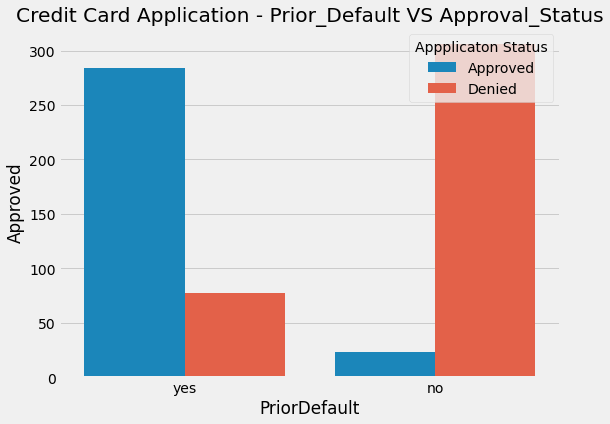

In [22]:
fig = plt.subplots(figsize=(8,6))
PriorDefaultPlot = sns.countplot(data=df_prior,x="PriorDefault", hue="Approved")
PriorDefaultPlot.set(xlabel="PriorDefault", ylabel="Approved")
PriorDefaultPlot.set_xticklabels(["yes", "no"])
plt.legend(title="Appplicaton Status", labels=["Approved", "Denied"], loc="upper right")
plt.title("Credit Card Application - Prior_Default VS Approval_Status")
plt.show()

In [23]:
# Looking at correlation between PriorDefault, Employed and Approval
df_prior.loc[:,["PriorDefault","Employed","Approved"]]


,PriorDefault,Employed,Approved
0,yes,yes,yes
1,yes,yes,yes
2,yes,no,yes
3,yes,yes,yes
4,yes,no,yes
...,...,...,...
685,no,no,no
686,no,yes,no
687,no,yes,no
688,no,no,no


In [24]:
# People who had a PriorDefault but are currently Employed vs Not Employed and were Approved
df.loc[(df['PriorDefault'] == 1) & (df['Employed'] == 1), 'Approved'].sum()
df.loc[(df['PriorDefault'] == 1) & (df['Employed'] == 0), 'Approved'].sum()

207

77

**Findings**
- PriorDefaults have a high correlation with approval and denial
- However, it is contrary to expectation, as approval is still high if a customer has had prior defaults, and the lack of prior defaults also impacts approval 
- While this may seem odd, it points to other variables at play. This is one of the limitations of the dataset as more information on prior defaults (e.g when the last default happened) might be more helpful 
- This is not within the scope of the notebook but simply an interesting observation; my hypothesis on why this may seem the case is as follows:
    - This could be a good thing for a customer as their default in the past (the dataset does not say how many/much which is a limitation on the dataset) does not necessarily count against them getting approved for a new line of credit.
    - One's failure to pay (i.e default) in a previous time may have some, but not as much, influence on ability to pay now - which is more likely tied to current employment status: from our analysis that is a significant 207 of them, out of 307 total approvals.
    - Alternatively, credit-issuing banks may accept customers with prior defaults if they can now prove a stream of income/ability to pay (i.e employment) as banks make money through interest rates on unpaid lines of credit (less creditworthy customers may get higher interest rates for example) and processing fees from merchants.

### Case Study C: CreditScore against Approved

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

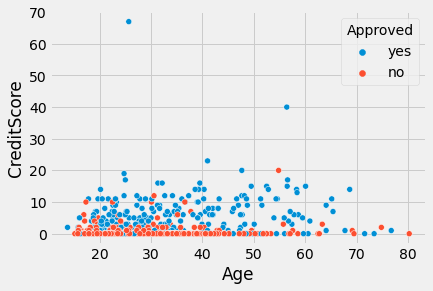

In [25]:
# Create a copy for study
df_ccs = df.copy()
# Renaming study components 0 and 1 to No and Yes
df_ccs['Approved'] = df_ccs['Approved'].map({1: 'yes', 0: 'no'})

# Plotting CreditScore against Age
sns.scatterplot(data=df_ccs, x="Age", y="CreditScore", hue="Approved")

<AxesSubplot:xlabel='YearsEmployed', ylabel='CreditScore'>

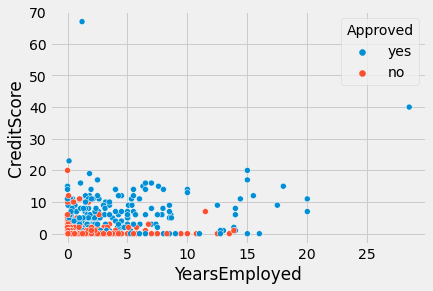

In [26]:
sns.scatterplot(data=df_ccs, x="YearsEmployed", y="CreditScore", hue="Approved")

**Findings**
- Credit scores are important in getting approved for a credit card, as it evaluates one's credit-worthiness (the higher the better) and risk indicator
- The credit scores on the lower end of the range have high denials, which is not surprising
- There also appears to be a correlation with age and creditscore with denials - the younger one is, the less time they have had to build up a creditscore, which is likely to lead to higher denials

#### The following distribution plots and boxplots will be used to study outliers

<AxesSubplot:xlabel='Age', ylabel='Density'>

<AxesSubplot:xlabel='Debt', ylabel='Density'>

<AxesSubplot:xlabel='YearsEmployed', ylabel='Density'>

<AxesSubplot:xlabel='Approved', ylabel='Density'>

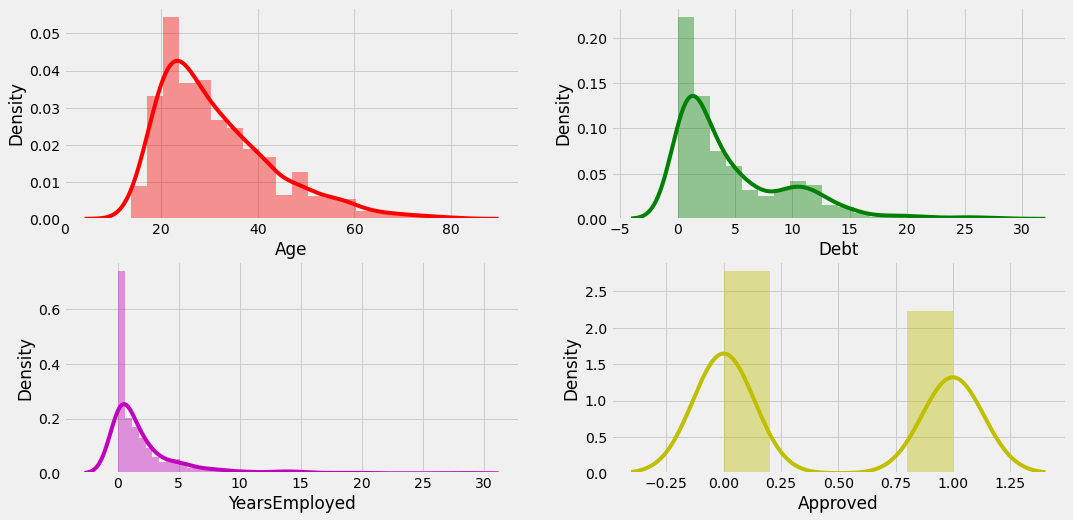

In [27]:
f, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)

sns.distplot(df.iloc[:,0], color='r', ax=axes[0,0])
sns.distplot(df.iloc[:,1], color='g', ax=axes[0,1])
sns.distplot(df.iloc[:,5], color='m', ax=axes[1,0])
sns.distplot(df.iloc[:,11], color='y', ax=axes[1,1])

plt.show()

- From the above, we can see that the data is slightly skewed and outliers are mostly on the right end
- However, outliers may not always need to be removed because it could cause data loss
- Could look into scaling when doing machine learning model
- This also tells me what type of scaling to select, between MinMax and Standard. As the graphs do not appear to follow a normal distribution, I would use MinMax Scaling

## Machine Learning Modelling

Now that we have done the EDA and identified the data we want to focus on for the machine learning model, we will explore a couple different classifiers and test the accuracy to find a model with the highest accuracy score.

In [28]:
# We'll start by converting all the non-numeric data to numeric using Label Encoding as the models require the data to be in numeric format

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             690 non-null    float64
 1   Debt            690 non-null    float64
 2   Married         690 non-null    int64  
 3   BankCustomer    690 non-null    int64  
 4   Industry        690 non-null    int32  
 5   YearsEmployed   690 non-null    float64
 6   PriorDefault    690 non-null    int64  
 7   Employed        690 non-null    int64  
 8   CreditScore     690 non-null    int64  
 9   DriversLicense  690 non-null    int64  
 10  Income          690 non-null    int64  
 11  Approved        690 non-null    int64  
dtypes: float64(3), int32(1), int64(8)
memory usage: 62.1 KB


**Initialize X and y variable for training data in following models**

In [29]:
# Set X and y variable. X is from index 0 to 11, and y is "Approved"
X=df.drop('Approved',axis=1)
y=df['Approved']

### Model 1 - KNeighbors Classification

In [30]:
#import KNN Classification libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
#initialize KNN
model = KNeighborsClassifier()

#fit data
model.fit(X,y)

# predict the response values for the observations in X ("test the model")
y_pred_kn = model.predict(X)
y_pred_kn

KNeighborsClassifier()

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# compute classification accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred_kn))

0.7927536231884058


- Initial accuracy score: 79%.

In [33]:
# STEP 1: Split into train and test sets. Train size 66%, test size 33%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# STEP 2: Train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Test the model on the training set, and check the accuracy
y_pred_kn_train = knn.predict(X_train)
print(accuracy_score(y_train, y_pred_kn_train))

# STEP 3: Test the model on the testing set, and check the accuracy
y_pred_kn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_kn))

KNeighborsClassifier(n_neighbors=1)

1.0
0.7105263157894737


- Accuracy score after train_test_split: 71%.

In [34]:
df['CreditScore'].max()

67

0.8245614035087719
0.8333333333333334
0.8377192982456141
0.8640350877192983
0.8640350877192983
0.868421052631579
0.868421052631579
0.8421052631578947
0.8464912280701754
0.8552631578947368


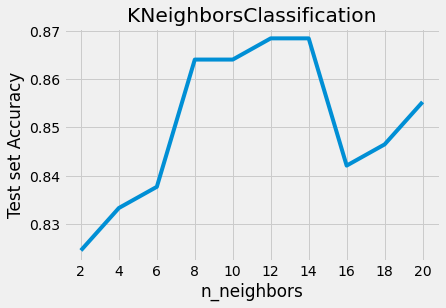

In [35]:
# STEP 1: Split into train and test sets. Train size 66%, test size 33%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# STEP 2: Scaling
# Import MinMaxScaler to scale data as seen from charts above, there are some extremes
# This will ensure that all values fall within comparable range of 0 to 1
# e.g Credit Score - currently the range is 0 to 67, although majority of data is within 0 to 25, with an outlier at 67
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

scores = []

# STEP 3: Run KNeighbors Classifier
for n in range(2, 20+1,2):
    knn = KNeighborsClassifier(n_neighbors = n)
    _ = knn.fit(X_train, y_train)
    y_pred_kn = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_kn))
    print(accuracy_score(y_test, y_pred_kn))

# STEP 4: Plot results and evaluate accuracy
_ = plt.plot(scores) 
_ = plt.xticks(ticks=range(10), labels=range(2,20+1,2))
_ = plt.title("KNeighborsClassification")
_ = plt.xlabel('n_neighbors')
_ = plt.ylabel('Test set Accuracy')

- After scaling, optimal KNN is 14, accuracy of 86.8%

In [36]:
# test with 50 neighbors
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

# test the model on the training set, and check the accuracy
y_pred_kn_train = knn.predict(X_train)
print(accuracy_score(y_train, y_pred_kn_train))

# test the model on the testing set, and check the accuracy
y_pred_kn = knn.predict(X_test)
acc_kn = accuracy_score(y_test, y_pred_kn)
print('Accuracy: ', acc_kn)

KNeighborsClassifier(n_neighbors=14)

0.8766233766233766
Accuracy:  0.868421052631579


- Accuracy Test on training set with optimal Kneighbors is 87.6%
- Accuracy Test on test set with optimal Kneighbors is 86.8%

#### Output Evaluation of KNeighborsClassifier

array([[109,  16],
       [ 14,  89]], dtype=int64)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


True Negatives(TN) =  109
True Positives(TN) =  89
False Positives(FP) =  16
False Negatives(FN) =  14


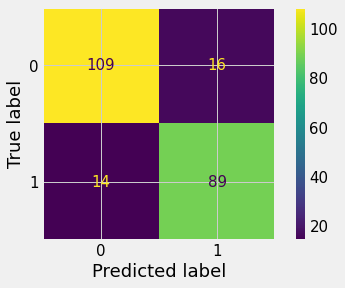

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

font = {'family' : 'normal',
       'size' : 15} 
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred_kn) # calculate
cm
cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

print('True Negatives(TN) = ', cm[0,0])
print('True Positives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

**ROC - Receiver Operating Characteristic Plot**

The ROC curve will allow us to visualize the performance of the binary classifier (approved or not approved), giving us the trade-off between the TP and FP at various classification threshold

Text(0.5, 1.0, 'ROC')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


AUC score:  0.9161941747572816


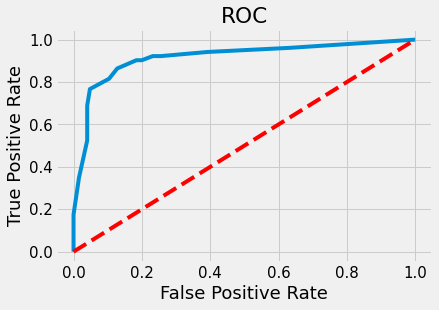

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

y_score = knn.predict_proba(X_test)[:,1] #returns probabilities of a classification label

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# True values come before predicted values in parameter order 
plt.plot([0,1],[0,1],'r--')
plt.title('ROC')
print('AUC score: ',roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])) 


In [39]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       125
           1       0.85      0.86      0.86       103

    accuracy                           0.87       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228



#### Summary and Findings
- Train size 66%, test size 33% - Prediction Accuracy 86.8%, AUC Score 91.6%
- KNeighbors presented with a fairly high accuracy score after scaling. The pre-scaling accuracy was low in comparison, probably due to the couple of outlier data in the set.
- By running classification accuracy and confusion matrix on the output, we can evaluate the model's performance.
- The confusion matrix denotes the true negatives (TN) that refer to the number of negative outputs (i.e denied applications) predicted by the model accurately, and true positives (TP) that refer to the number of positive outputs (i.e approved applications) predicted by the model accurately.
- From a business use case, this is important as while it is possible and fairly common to try to get a credit card reconsideration (i.e call a bank to reconsider a denied application for approval (False Negative)), it is much more risky for a bank to approve an application that should have been denied (i.e False Positive) for various reasons such as the customer being more likely to default, resulting in a cost to the bank.

**Business Use Case** 

Confusion matrix is useful in understanding the output of the model, however, each prediction is treated/weighted equally. It does not take into consideration that it is more costly to incorrectly classify an un-creditworthy customer for approval, than it is to incorrectly classify a worthy customer for denial (which can be appealed). Using a cost-benefit matrix can help by scoring each of the four possible outcomes to weigh each outcome differently. This will give us better real-world impact. 

In this example estimate, let's assume that:
- True Positive (TP) = +1000 dollars: correctly identifying customers for credit card approval will enable bank to generate revenue from them
- True Negative (TN) = 0 dollars: as the bank does not lose any money/has no money at risk 
- False Positive (FP) = -2000 dollars: incorrectly identifying customers for approval is risky and could lead to bank losing money, as the customer is more likely to default on the line of credit given, hence exposing the bank to loss. This is especially risky in 2022, due to the trending signs of economic downturn, as banks may want to be tightening their belt.
- False Negative (FN) = -1000 dollars: represents the lost revenue from a customer who might otherwise be approved

With the above, we could have the following:

- Benefit of a True Positive (TP): 89* 1000 = +89000 
- Benefit of a True Negative (TN): 0 
- Cost of a False Positive (FP): -16* 2000 = -32000
- Cost of a False Negative (FN): -14* 1000 = -14000

Total Benefit for Bank: +43000 dollars



### Model 2 - Logistic Regression

Due to the various correlations investigated in EDA, a logistic regression model might work well as it is a generalized linear model. Let's investigate.

In [40]:
# Import libraries for logistic regression
from sklearn.linear_model import LogisticRegression

In [41]:
# X and y already initialized earlier

# Initialize logistic regressional model
logreg = LogisticRegression()

# Train Test Split with same parameters
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Accuracy Score
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy: ', acc_lr)

LogisticRegression()

Accuracy:  0.8464912280701754


#### Output Evaluation of LogisticRegressionClassifier

array([[100,  25],
       [ 10,  93]], dtype=int64)

True Negatives(TN) =  100
True Positives(TN) =  93
False Positives(FP) =  25
False Negatives(FN) =  10


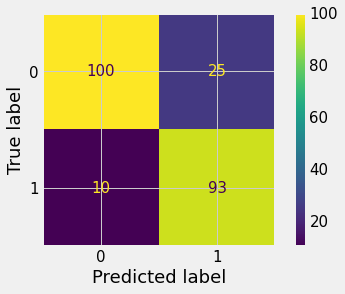

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

font = {'family' : 'normal',
       'size' : 15} # can change the size, e.g 7 for smaller, 25 for bigger
plt.rc('font', **font) # default confusion matrix text size is too small.

cm = confusion_matrix(y_test, y_pred_lr) # calculate
cm
cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

print('True Negatives(TN) = ', cm[0,0])
print('True Positives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

#### Summary and Findings
- Train size 66%, test size 33% - Prediction Accuracy 84.7%
- The logistic regression model performed comparably to KNeighbors.
- GridSearch was used to perform hyperparameter tuning in order to determine optimal values (to bring best accurancy) for the LR model to see if it would bring accuracy closer to/above KNeighbors. However, it actually performed slightly worse. This could be due to overfitting on the training model. 

**Business Use Case**

Cost-Benefit matrix estimate:

- Benefit of a True Positive (TP): 93* 1000 = +93000 
- Benefit of a True Negative (TN): 0 
- Cost of a False Positive (FP): -25* 2000 = -50000
- Cost of a False Negative (FN): -10* 1000 = -10000

Total Benefit for Bank: +33000 dollars

### Model 3 - Decision Tree Classifier

In [43]:
# Preparing the machine learning model
from sklearn.tree import DecisionTreeClassifier

# As we have no missing values, we do not need SimpleInputer here

# STEP 1: Split into train and test sets. Train size 66%, test size 33%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# STEP 2: Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# STEP 3: Run Decision Tree Fit on train test set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

# STEP 4: Run Accuracy score 
acc_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy: ', acc_dt)

DecisionTreeClassifier()

Accuracy:  0.8421052631578947


#### Output Evaluation of DecisionTreeClassifier

array([[108,  17],
       [ 19,  84]], dtype=int64)

True Negatives(TN) =  108
True Positives(TN) =  84
False Positives(FP) =  17
False Negatives(FN) =  19


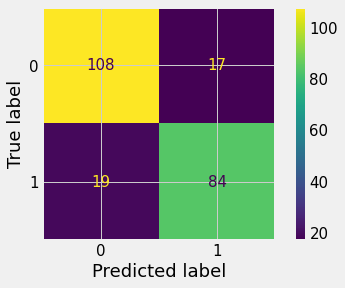

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

font = {'family' : 'normal',
       'size' : 15} # can change the size, e.g 7 for smaller, 25 for bigger
plt.rc('font', **font) # default confusion matrix text size is too small.

cm = confusion_matrix(y_test, y_pred_dt) # calculate
cm
cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

print('True Negatives(TN) = ', cm[0,0])
print('True Positives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Text(0.5, 1.0, 'ROC')

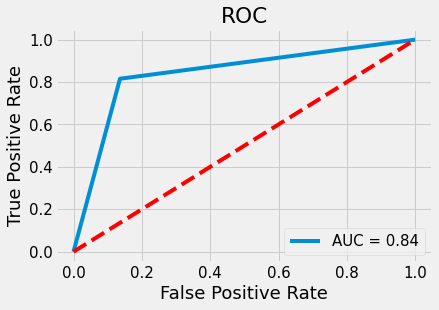

AUC score:  0.8397669902912621


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

y_score = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()

plt.plot([0,1],[0,1],'r--')
plt.title('ROC')
plt.show()


print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

#### Summary and Findings
- Train size 66%, test size 33% - Prediction Accuracy 82.4%, ROC Accuracy 82.0%
- The confusion matrix shows that 188 out of 228 labels were correctly classified
- The Decision Tree model has the lowest accuracy score of all 3 models tested

**Business Use Case**

Cost-Benefit matrix estimate:

- Benefit of a True Positive (TP): 78* 1000 = +78000 
- Benefit of a True Negative (TN): 0 
- Cost of a False Positive (FP): -17* 2000 = -34000
- Cost of a False Negative (FN): -25* 1000 = -25000

Total Benefit for Bank: +19000 dollars

### Comparing accuracy of all 3 Models in chart

Text(0.0, 87.8421052631579, '86.8421052631579%')

Text(1.0, 85.64912280701753, '84.64912280701753%')

Text(2.0, 85.21052631578947, '84.21052631578947%')

Text(0.5, 1.0, 'Accuracy of models')

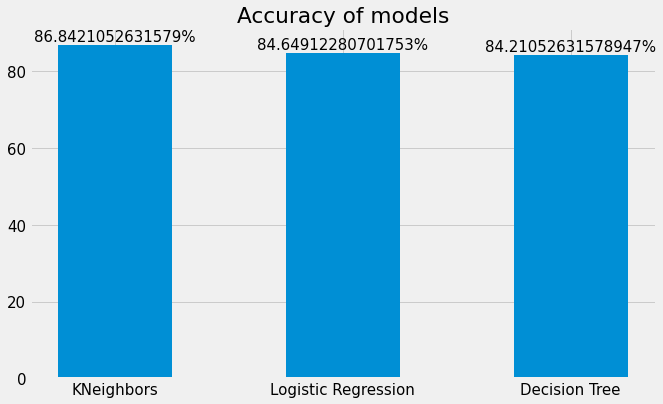

In [46]:
# Plotting accuracy values of the 3 models
x=['KNeighbors','Logistic Regression','Decision Tree']
y=[acc_kn*100, acc_lr*100, acc_dt*100]

# Plot the graph
width = 0.5
fig, ax = plt.subplots(figsize=(10,6))

pps = ax.bar(x, y, width, align='center')

# Make some labels
for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+1,
      s="{}%".format(height),
      ha='center')

plt.title('Accuracy of models')
plt.show()

# Overall Investigation Findings and Summary

- This notebook utilized various methods to understand the dataset, perform EDA to identify and prioritize relationships, trends, and outliers that would help with the machine learning modelling. Even with a clean dataset, additional work to handle outliers, scaling, and data not relevant to the ML model may need to be done to complete data preparation for the modelling.
- The heatmap and charts were very useful in providing an overview of the correlation between various features against approval, while providing further information on what kind of scaling to use subsequently in machine learning modelling due to the uneven distribution of data
- After data exploration and data preparation was done, we implemented 3 different models: KNeighbors Classification, Logistic Regression, and Decision Tree to evaluate the prediction accuracy and output analysis of each and find the model best suited for our credit card prediction model
- After evaluating the 3 models in terms of prediction accuracy and output, and business use case - The KNeighbors model provides most value to the bank  in terms of its model accuracy (86.8%), AUC Score in terms of model performance (91.6%), and cost of correct vs incorrect predictions (+43000 dollars) via business use case cost matrix estimates which combined can be significant. 


### Limitations of dataset and results

- A limitation of this dataset would be the size; if the dataset was larger we might have a more accurate model and predictions due to a larger training dataset. This one was more limited at less than 1000 rows.
- This dataset appears to be fairly old, so it may be limited in terms of how it applies to modern credit card approval analysis, which likely would take into account other variables such as criminal records, number of approvals in the last 24 months (common in the USA amongst card issuers), number of hard/soft inquiries, and more. 
- For further model improvement, we can look into investigating and adapting other models such as random forest.